# S06 T01: Tasca mètodes de mostreig

**Descripció**:

Aprèn a realitzar mostreig de les dades amb Python.

**Nivell 1**

- Exercici 1 :

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

# NBA Players

## Biometric, biographic and basic box score features from 1996 to 2019 season

Dataset file: [NBA Players](https://www.kaggle.com/justinas/nba-players-data?select=all_seasons.csv)

**Description**:

**Update 02-08-2021**: The data now includes 2020 season and metrics for 2019 have been updated.

**Update 08-03-2020**: The data now includes 2017, 2018 and 2019 seasons. Keep in mind that metrics like gp, pts, reb, etc. are not complete for 2019 season, as it is ongoing at the time of upload.

Context :
As a life-long fan of basketball I always wanted to combine my enthusiasm for the sport with passion for analytics. So, I utilized the NBA Stats API to pull together this data set. I hope it will prove to be as interesting to work with for you as it has been for me!

Content :
The data set contains over two decades of data on each player who has been part of an NBA teams' roster.  captures demographic variables such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds,It assists, etc.

The pull initially contained 52 rows of missing data. The gaps have been manually filled using data from Basketball Reference. I am not aware of any other data quality issues.

Analysis Ideas :
The data set can be used to explore how age/height/weight tendencies have changed over time due to changes in game philosophy and player development strategies. Also, it could be interesting to see how geographically diverse the NBA is and how oversees talents have influenced it. A longitudinal study on players' career arches can also be performed.

`Player` - Player name

`team_abbreviation` - team names

`age` - age of player

The variables are quite self explanatory until

`gp` - games played

`pts` - average pts per game

`reb` - rebounds per game

`ast` - assists per game

`net_rating` - Team’s point differential per 100 possessions while the player is on the court

`oreb_pct` - Percentage of available offensive rebounds the player grabbed while he was on the floor

`dreb_pct` - Percentage of available defensive rebounds the player grabbed while he was on the floor

`usg_pct` - Percentage of team plays used by the player while he was on the floor

`ts_pct` - Measure of the player’s shooting efficiency that takes into account free throws, 2 and 3 point shots

`ast_pct` - Percentage of teammate field goals the player assisted while he was on the floor

`season` - NBA season

In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

- Set pandas float_format with pandas set_option

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 1000, 'display.width', 1000, 'display.max_rows',1000)
#pd.set_option('display.max_colwidth', None)

1. Read the data as a pandas dataframe and display the first 5 rows

In [63]:
all_seasons_df = pd.read_csv("./input/all_seasons.csv").drop('Unnamed: 0',axis = 1) #, index_col = 0
all_seasons_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.000,213.360,106.594,Connecticut,USA,1996,1,29,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.000,210.820,106.594,North Carolina-Wilmington,USA,1992,2,50,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.000,208.280,106.594,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.000,210.820,111.130,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.000,205.740,106.594,None,USA,1996,1,25,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114,1996-97


- Visualization of the all NBA seasons since 1996

In [64]:
#all_seasons_df.groupby(['season']).count()
all_seasons_df['season'].value_counts().sort_index(ascending=False)#.plot.barh()

2020-21    540
2019-20    529
2018-19    530
2017-18    540
2016-17    486
2015-16    476
2014-15    492
2013-14    482
2012-13    469
2011-12    478
2010-11    452
2009-10    442
2008-09    445
2007-08    451
2006-07    458
2005-06    458
2004-05    464
2003-04    442
2002-03    428
2001-02    440
2000-01    441
1999-00    438
1998-99    439
1997-98    439
1996-97    441
Name: season, dtype: int64

- Number of seasons played by the each player

In [65]:
all_seasons_df['player_name'].value_counts()

Vince Carter      22
Dirk Nowitzki     21
Kobe Bryant       20
Kevin Garnett     20
Jamal Crawford    20
                  ..
Gian Clavell       1
Tito Maddox        1
DeQuan Jones       1
Adonis Jordan      1
Mason Jones        1
Name: player_name, Length: 2333, dtype: int64

- The number of seasons played by Kobe Bryan is confirmed by doing a simple check

In [66]:
# filtering with query method
df = all_seasons_df.query('player_name == "Kobe Bryant"')#, inplace = True
df.shape

(20, 21)

- We make a grouping by player and season

In [67]:

grouped = all_seasons_df.groupby(['player_name', 'season']).count()
grouped.head(10)

team_abbreviation  age  player_height  player_weight  college  country  draft_year  draft_round  draft_number  gp  pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct
player_name   season                                                                                                                                                                                             
A.C. Green    1996-97                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
              1997-98                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
              1998-99                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
              1999-00                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
              2000-01                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
A.J. Bramlett 1999-00                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
A.J. Guyton   2000-01                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
              2001-02                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
              2002-03                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1
AJ Hammons    2016-17                  1    1              1              1        1        1           1            1             1   1    1    1    1           1         1         1        1       1        1

2. Display the number of rows and columns in the database.

In [68]:
all_seasons_df.shape

(11700, 21)

In [69]:
# Checking for null values
all_seasons_df.dropna(inplace=True)
all_seasons_df.shape

(11700, 21)

In [70]:
# Checking for duplicate values; False => NO duplicated values
all_seasons_df.duplicated().values.any()

False

In [72]:
all_seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

In [73]:
all_seasons_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000,11700.000,11700.000,11700.000,11700.000,11700.000,11700.000,11700.000,11700.000,11700.000,11700.000,11700.000,11700.000
mean,27.132,200.729,100.527,51.717,8.169,3.565,1.811,-2.166,0.055,0.142,0.185,0.510,0.131
std,4.340,9.170,12.526,24.985,5.956,2.487,1.792,12.077,0.044,0.063,0.053,0.098,0.094
min,18.000,160.020,60.328,1.000,0.000,0.000,0.000,-200.000,0.000,0.000,0.000,0.000,0.000
25%,24.000,193.040,90.718,32.000,3.600,1.800,0.600,-6.300,0.021,0.096,0.150,0.479,0.065
50%,26.000,200.660,99.790,58.000,6.700,3.000,1.200,-1.300,0.042,0.132,0.182,0.523,0.103
75%,30.000,208.280,108.862,74.000,11.500,4.700,2.400,3.200,0.084,0.180,0.218,0.559,0.178
max,44.000,231.140,163.293,85.000,36.100,16.300,11.700,300.000,1.000,1.000,1.000,1.500,1.000


- We set the index of the data frame by season. 

In [74]:
season_wise_df = all_seasons_df.set_index(['player_name','season'])

# Set undrafted to null
Undrafted = season_wise_df[season_wise_df['draft_year'] == 'Undrafted']
season_wise_df['draft_year'] = season_wise_df['draft_year'].replace('Undrafted', np.NaN) 
season_wise_df['draft_round'] = season_wise_df['draft_round'].replace('Undrafted', np.NaN)
season_wise_df['draft_number'] = season_wise_df['draft_number'].replace('Undrafted', np.NaN)
season_wise_df

,,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,season,,,,,,,,,,,,,,,,,,,
Travis Knight,1996-97,LAL,22.000,213.360,106.594,Connecticut,USA,1996,1,29,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052
Matt Fish,1996-97,MIA,27.000,210.820,106.594,North Carolina-Wilmington,USA,1992,2,50,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000
Matt Bullard,1996-97,HOU,30.000,208.280,106.594,Iowa,USA,NaN,NaN,NaN,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099
Marty Conlon,1996-97,BOS,29.000,210.820,111.130,Providence,USA,NaN,NaN,NaN,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101
Martin Muursepp,1996-97,DAL,22.000,205.740,106.594,None,USA,1996,1,25,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Matthew Dellavedova,2020-21,CLE,30.000,190.500,90.718,St.Mary's College of California,Australia,NaN,NaN,NaN,13,2.800,1.800,4.500,-3.100,0.029,0.085,0.125,0.312,0.337
Maurice Harkless,2020-21,SAC,28.000,200.660,99.790,St. John's,USA,2012,1,15,37,5.200,2.400,1.200,-2.900,0.017,0.097,0.114,0.527,0.071
Max Strus,2020-21,MIA,25.000,195.580,97.522,DePaul,USA,NaN,NaN,NaN,39,6.100,1.100,0.600,-4.200,0.011,0.073,0.179,0.597,0.074


In [75]:
# selecting columns required for analysis
cols_analysis = ['age','player_height','player_weight','gp','pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct']
analysis_sampling_df = season_wise_df[cols_analysis]
analysis_sampling_df

,,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,season,,,,,,,,,,,,,
Travis Knight,1996-97,22.000,213.360,106.594,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052
Matt Fish,1996-97,27.000,210.820,106.594,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000
Matt Bullard,1996-97,30.000,208.280,106.594,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099
Marty Conlon,1996-97,29.000,210.820,111.130,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101
Martin Muursepp,1996-97,22.000,205.740,106.594,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Matthew Dellavedova,2020-21,30.000,190.500,90.718,13,2.800,1.800,4.500,-3.100,0.029,0.085,0.125,0.312,0.337
Maurice Harkless,2020-21,28.000,200.660,99.790,37,5.200,2.400,1.200,-2.900,0.017,0.097,0.114,0.527,0.071
Max Strus,2020-21,25.000,195.580,97.522,39,6.100,1.100,0.600,-4.200,0.011,0.073,0.179,0.597,0.074


- A simple random sample with n observations is generated.

In [76]:
simple_all_seasons_df = analysis_sampling_df.sample(n = 500).sort_index(ascending = True)
simple_all_seasons_df

2.058  23  2.000  1.200  0.400     -20.800     0.035     0.103    0.151   0.398    0.078
Quinn Cook              2018-19 26.000        187.960         81.193  74  6.900  2.100  1.600      -6.300     0.021     0.123    0.200   0.565    0.167
Quinton Ross            2005-06 25.000        198.120         87.543  67  4.700  2.500  1.200       5.500     0.032     0.095    0.120   0.465    0.077
RJ Hunter               2016-17 23.000        195.580         83.915   3  0.000  0.300  0.000     -57.800     0.000     0.077    0.042   0.000    0.000
Raef LaFrentz           2002-03 27.000        210.820        111.130  69  9.300  4.800  0.800       7.700     0.085     0.142    0.168   0.578    0.050
Rafer Alston            2005-06 29.000        187.960         77.111  63 12.100  4.000  6.700      -1.900     0.017     0.105    0.187   0.475    0.300
Ramon Sessions          2010-11 25.000        190.500         86.182  81 13.300  3.100  5.200     -11.400     0.024     0.113    0.241   0.559    0.351
                        2011-12 26.000        190.500         86.182  64 11.300  3.300  5.500      -1.500     0.022     0.118    0.214   0.535    0.353
                        2014-15 29.000        190.500         86.182  64  6.300  2.300  2.800      -5.600     0.023     0.108    0.191   0.490    0.258
Randy Livingston        2006-07 32.000        193.040         94.801   4  0.000  0.300  1.000     -90.600     0.036     0.000    0.078   0.000    0.308
Rasho Nesterovic        1998-99 23.000        213.360        112.491   2  4.000  4.000  0.500       2.900     0.086     0.250    0.187   0.311    0.045
                        2005-06 30.000        213.360        115.666  80  4.500  3.900  0.400       9.900     0.094     0.144    0.128   0.521    0.033
Rasual Butler           2006-07 28.000        200.660         92.986  81 10.100  3.200  0.800      -3.000     0.021     0.112    0.186   0.495    0.048
                        2013-14 35.000        200.660         97.522  50  2.700  0.800  0.300      -5.900     0.018     0.100    0.157   0.585    0.075
Rawle Marshall          2005-06 24.000        200.660         86.182  23  3.100  1.300  0.400      -2.000     0.042     0.104    0.174   0.488    0.070
Ray Allen               2010-11 35.000        195.580         92.986  80 16.500  3.400  2.700       8.100     0.023     0.090    0.198   0.615    0.122
Reece Gaines            2005-06 25.000        198.120         92.986  12  1.100  0.000  0.300     -19.700     0.000     0.000    0.141   0.472    0.111
Reggie Evans            2011-12 32.000        203.200        111.130  56  1.900  4.800  0.300     -11.600     0.165     0.311    0.089   0.504    0.035
Reggie Jordan           1999-00 32.000        193.040         88.450  36  1.100  1.100  0.900       4.700     0.076     0.102    0.140   0.349    0.213
Reggie Williams         1996-97 33.000        201.000         86.000  13  5.800  2.400  0.800     -12.800     0.026     0.142    0.196   0.468    0.093
Richard Jefferson       2004-05 25.000        200.660        102.058  33 22.200  7.300  4.000      -5.300     0.044     0.166    0.283   0.537    0.204
                        2007-08 28.000        200.660        102.058  82 22.600  4.200  3.100      -4.900     0.034     0.091    0.260   0.571    0.146
Rick Fox                2000-01 31.000        200.660        109.769  82  9.600  4.000  3.200       6.100     0.040     0.116    0.162   0.562    0.168
Ricky Davis             1999-00 20.000        200.660         89.358  48  4.700  1.700  1.300      -6.700     0.058     0.104    0.193   0.542    0.176
                        2007-08 28.000        200.660         92.986  82 13.800  4.300  3.400     -10.400     0.022     0.122    0.200   0.534    0.167
Robert Traylor          2004-05 28.000        203.200        128.820  74  5.500  4.500  0.800      -2.000     0.111     0.176    0.173   0.461    0.075
Robert Williams III     2019-20 22.000        203.200        107.501  29  5.200  4.400  0.900       6.100     0

In [77]:
simple_all_seasons_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,27.092,200.137,100.025,52.576,8.368,3.536,1.844,-2.655,0.055,0.138,0.185,0.513,0.134
std,4.287,9.191,12.676,24.821,5.929,2.366,1.739,11.594,0.041,0.062,0.050,0.094,0.099
min,19.000,160.020,60.328,1.000,0.000,0.000,0.000,-120.000,0.000,0.000,0.000,0.000,0.000
25%,24.000,193.040,90.718,33.000,3.800,1.800,0.600,-6.925,0.023,0.092,0.151,0.481,0.067
50%,26.000,200.660,99.790,59.000,7.000,2.950,1.300,-1.250,0.041,0.126,0.180,0.524,0.105
75%,30.000,205.740,108.862,74.000,11.600,4.700,2.600,3.450,0.083,0.177,0.218,0.562,0.176
max,39.000,228.600,142.881,83.000,29.700,13.600,10.200,25.000,0.250,0.500,0.347,1.000,1.000


- In order to generate a systematic random sample, we first obtain two random numbers to be used as "init" and "step" to pick the data from the new data set.

In [81]:
init = np.random.randint(1, 50)
step = np.random.randint(1, 50)

- Compute the length of the array

In [82]:
end  = len(analysis_sampling_df) 

In [83]:
print('init:',init,'end:',end,'step:',step)

init: 30 end: 11700 step: 27


- Generate a systematic random sample:

In [84]:
systematic_all_seasons_df = analysis_sampling_df[init : end : step]
systematic_all_seasons_df

,,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,season,,,,,,,,,,,,,
P.J. Brown,1996-97,27.000,210.820,108.862,80,9.500,8.400,1.200,7.400,0.110,0.192,0.157,0.505,0.059
Karl Malone,1996-97,33.000,205.740,116.120,82,27.400,9.900,4.500,12.800,0.086,0.243,0.325,0.600,0.234
Lionel Simmons,1996-97,28.000,200.660,95.254,41,3.400,2.500,1.400,-10.500,0.065,0.173,0.162,0.442,0.179
Wayman Tisdale,1996-97,33.000,205.740,117.934,53,6.500,2.300,0.400,-3.500,0.052,0.127,0.253,0.441,0.045
Tyrone Corbin,1996-97,34.000,198.120,102.058,70,9.500,4.200,1.800,10.500,0.041,0.111,0.153,0.514,0.089
Sherman Douglas,1996-97,30.000,185.420,88.450,79,9.700,2.400,5.400,-3.000,0.030,0.069,0.168,0.557,0.289
Rony Seikaly,1996-97,32.000,210.820,114.759,74,17.300,9.500,1.200,-1.700,0.122,0.197,0.238,0.567,0.064
Jerome Kersey,1996-97,35.000,200.660,108.862,70,6.800,5.200,1.300,4.100,0.072,0.164,0.145,0.475,0.077
Christian Laettner,1996-97,27.000,210.820,111.130,82,18.100,8.800,2.700,11.000,0.084,0.186,0.236,0.562,0.133


In [85]:
systematic_all_seasons_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,433.000,433.000,433.000,433.000,433.000,433.000,433.000,433.000,433.000,433.000,433.000,433.000,433.000
mean,27.323,201.247,100.891,51.081,8.138,3.626,1.774,-2.048,0.054,0.142,0.185,0.509,0.130
std,4.343,8.897,12.752,25.437,5.921,2.547,1.740,10.793,0.039,0.057,0.053,0.096,0.101
min,19.000,175.260,73.028,1.000,0.000,0.000,0.000,-96.100,0.000,0.000,0.057,0.000,0.000
25%,24.000,195.580,91.172,31.000,3.400,1.800,0.600,-6.200,0.020,0.100,0.150,0.478,0.064
50%,27.000,203.200,102.058,59.000,6.700,3.000,1.200,-1.100,0.046,0.136,0.179,0.526,0.100
75%,30.000,208.280,108.862,73.000,11.700,4.900,2.300,3.300,0.087,0.183,0.220,0.561,0.171
max,40.000,223.520,142.881,83.000,29.300,13.000,11.100,63.900,0.196,0.301,0.500,0.750,1.000


3. Display 'Manu Ginobili' point averages for each of his seasons in the database.

Nested lists, deeper levels:

\---- leave here an empty row
   
  * first level A item - no space in front the bullet character
   * second level Aa item - 1 space is enough
       * third level Aaa item - 5 spaces min
      * second level Ab item - 4 spaces possible too
  * first level B item
  * 
[comment]: # (Esto son dos lineas en blanco!!)
<br/><br/>

&nbsp;&nbsp;

$~$

Line one\
\
\
\
Line two

` `  
` `  

[comment]: # (Esto es un comentario!!)

<!-- (<-- two spaces) <br/> \ &nbsp; Shift + Enter -->

Sources:
   - [loc-iloc](https://www.geeksforgeeks.org/select-rows-columns-by-name-or-index-in-pandas-dataframe-using-loc-iloc/)  
   - [loc-iloc](https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/)  
   - [Multiindex](https://stackoverflow.com/questions/53927460/select-rows-in-pandas-multiindex-dataframe)

In [86]:
#analysis_sampling_df.loc[analysis_sampling_df.player_name == 'Manu Ginobili', ['player_name', 'pts', 'season']]
#analysis_sampling_df.loc[['Manu Ginobili'],['pts']]
#analysis_sampling_df.loc[['Manu Ginobili', 'LeBron James'],['pts']]
analysis_sampling_df.loc['Manu Ginobili',['pts']].head(10)
#analysis_sampling_df.loc[[('Manu Ginobili','2002-03')],['pts','pts','reb','ast']]

,pts
season,
2002-03,7.600
2003-04,12.800
2004-05,16.000
2005-06,15.100
2006-07,16.500
2007-08,19.500
2008-09,15.500
2009-10,16.500
2010-11,17.400


4. List all the rows for Argentina players.

In [87]:
all_seasons_df.query("country == 'Argentina'")

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1812,Ruben Wolkowyski,SEA,27.000,208.280,122.470,None,Argentina,Undrafted,Undrafted,Undrafted,34,2.200,1.400,0.100,0.900,0.043,0.113,0.153,0.399,0.015,2000-01
1828,Pepe Sanchez,PHI,24.000,193.040,88.450,Temple,Argentina,Undrafted,Undrafted,Undrafted,29,0.700,0.500,1.400,-1.400,0.023,0.089,0.107,0.346,0.402,2000-01
2672,Pepe Sanchez,DET,26.000,193.040,88.450,Temple,Argentina,Undrafted,Undrafted,Undrafted,9,0.000,0.700,0.900,1.200,0.095,0.080,0.084,0.000,0.364,2002-03
2727,Manu Ginobili,SAS,25.000,198.120,95.254,None,Argentina,1999,2,57,69,7.600,2.300,2.000,6.800,0.039,0.091,0.182,0.556,0.163,2002-03
2850,Ruben Wolkowyski,BOS,29.000,208.280,124.738,None,Argentina,Undrafted,Undrafted,Undrafted,7,0.700,0.100,0.100,-61.300,0.000,0.059,0.145,0.434,0.125,2002-03
3169,Manu Ginobili,SAS,26.000,198.120,95.254,None,Argentina,1999,2,57,77,12.800,4.500,3.800,8.700,0.043,0.128,0.217,0.536,0.218,2003-04
3599,Manu Ginobili,SAS,27.000,198.120,92.986,None,Argentina,1999,2,57,74,16.000,4.400,3.900,16.600,0.041,0.136,0.242,0.609,0.217,2004-05
3756,Carlos Delfino,DET,22.000,198.120,104.326,None,Argentina,2003,1,25,30,3.900,1.800,1.300,-2.500,0.035,0.114,0.162,0.431,0.138,2004-05
3807,Andres Nocioni,CHI,25.000,200.660,102.058,None,Argentina,Undrafted,Undrafted,Undrafted,81,8.400,4.800,1.500,-3.800,0.041,0.193,0.196,0.484,0.111,2004-05
3988,Fabricio Oberto,SAS,31.000,208.280,111.130,None,Argentina,Undrafted,Undrafted,Undrafted,59,1.700,2.100,0.500,-1.900,0.139,0.156,0.127,0.491,0.089,2005-06


5. Calculate the average assists per season for 'Facundo Campazzo'

In [88]:
all_seasons_df.loc[all_seasons_df.player_name == 'Facundo Campazzo'].ast.mean()

3.6

6. Group the dataset by player then season in ascending order.

In [89]:
grouped = all_seasons_df.groupby(['player_name', 'season'])
grouped.first()

team_abbreviation    age  player_height  player_weight        college    country draft_year draft_round draft_number  gp    pts   reb   ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct
player_name        season                                                                                                                                                                                                       
A.C. Green         1996-97               DAL 33.000        205.740        102.058   Oregon State        USA       1985           1           23  83  7.200 7.900 0.800      -8.000     0.100     0.207    0.119   0.523    0.045
                   1997-98               DAL 34.000        205.740        102.058   Oregon State        USA       1985           1           23  82  7.300 8.100 1.500      -7.200     0.090     0.196    0.118   0.496    0.074
                   1998-99               DAL 35.000        205.740        102.058   Oregon State        USA       1985           1           23  50  4.900 4.600 0.500      -5.600     0.097     0.179    0.148   0.441    0.043
                   1999-00               LAL 36.000        205.740        102.058   Oregon State        USA       1985           1           23  82  5.000 5.900 1.000       8.100     0.089     0.179    0.111   0.482    0.058
                   2000-01               MIA 37.000        205.740        102.058   Oregon State        USA       1985           1           23  82  4.500 3.800 0.500       3.300     0.089     0.171    0.141   0.492    0.050
...                                      ...    ...            ...            ...            ...        ...        ...         ...          ...  ..    ...   ...   ...         ...       ...       ...      ...     ...      ...
Zydrunas Ilgauskas 2007-08               CLE 33.000        220.980        117.934           None  Lithuania       1996           1           20  73 14.100 9.300 1.400       0.700     0.132     0.217    0.229   0.522    0.082
                   2008-09               CLE 34.000        220.980        117.934           None  Lithuania       1996           1           20  65 12.900 7.500 1.000      14.800     0.109     0.212    0.237   0.523    0.060
                   2009-10               CLE 35.000        220.980        117.934           None  Lithuania       1996           1           20  64  7.400 5.400 0.800       7.900     0.107     0.197    0.189   0.491    0.058
                   2010-11               MIA 36.000        220.980        117.934           None  Lithuania       1996           1           20  72  5.000 4.000 0.400       9.400     0.119     0.178    0.159   0.531    0.033
Zylan Cheatham     2019-20               NOP 24.000        195.580         99.790  Arizona State        USA  Undrafted   Undrafted    Undrafted   4  3.000 2.300 0.800     -23.900     0.062     0.128    0.103   0.667    0.094

[11696 rows x 19 columns]

7. For each player, determine the number of seasons they have played since 1996.

In [90]:
seasons_played = all_seasons_df.player_name.value_counts()
seasons_played.head()

Vince Carter      22
Dirk Nowitzki     21
Kobe Bryant       20
Kevin Garnett     20
Jamal Crawford    20
Name: player_name, dtype: int64

8. 'Manu Ginobili' average points per season.

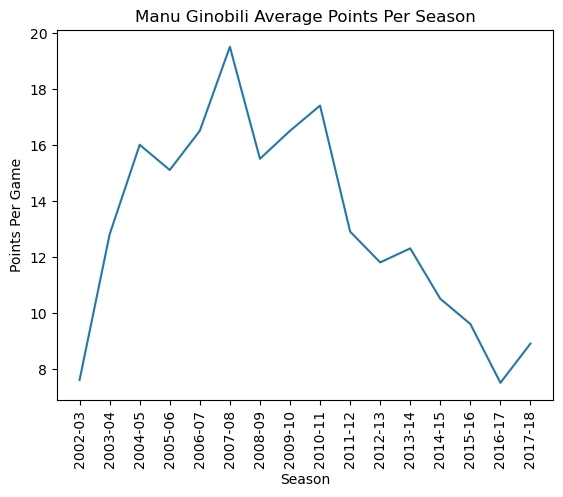

In [91]:
import matplotlib.pyplot as plt

ginobili_statistics = all_seasons_df.loc[all_seasons_df.player_name == 'Manu Ginobili', ['pts','season']]
plt.plot(ginobili_statistics["season"], ginobili_statistics["pts"])
plt.ylabel('Points Per Game')
plt.xticks(rotation=90)
plt.title("Manu Ginobili Average Points Per Season")
plt.xlabel('Season')
plt.show()

9. Sort the dataset descending by rebounds per game and display the top 10 single season performances.

In [92]:
all_seasons_df['pts'].sort_values(ascending=False).head(10)

10507   36.100
4348    35.400
10750   34.300
4007    33.000
2747    32.100
11535   32.000
7952    32.000
4835    31.600
9305    31.600
2631    31.400
Name: pts, dtype: float64

10. What is the highest points per game that Kobe Bryant achieved in a single season?

In [93]:
all_seasons2 = all_seasons_df.loc[all_seasons_df.player_name == 'Kobe Bryant']
all_seasons2['pts'].max()

35.4

**Nivell 2**

- Exercici 2 :

Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).


### Stratified sampling

In [94]:
all_seasons_df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'], dtype='object')

- The dataset contains the birthplace of each player who has made an NBA team's roster. It could be interesting to see the geographic diversity of the NBA and the influence of foreign talent.  

In [95]:
all_seasons_df['country'].unique()

array(['USA', 'Jamaica', 'Serbia and Montenegro', 'Ukraine', 'Canada',
       'Croatia', 'Lithuania', 'Nigeria', 'Congo',
       'St. Vincent & Grenadines', 'US Virgin Islands', 'France',
       'Slovenia', 'Dominican Republic', 'Germany', 'Georgia',
       'New Zealand', 'Belize', 'England', 'Argentina',
       'U.S. Virgin Islands', 'Greece', 'Senegal', 'China', 'Turkey',
       'Finland', 'Mali', 'Puerto Rico', 'Mexico', 'Yugoslavia', 'Serbia',
       'Spain', 'Venezuela', 'Haiti', 'Russia', 'Ireland', 'Brazil',
       'Scotland', 'Poland', 'Netherlands', 'Czech Republic',
       'Montenegro', 'United Kingdom', 'Democratic Republic of the Congo',
       'Latvia', 'South Korea', 'Uruguay', 'Sudan (UK)', 'Australia',
       'USSR', 'Italy', 'Switzerland', 'Gabon', 'Cameroon', 'Iran',
       'Israel', 'Sweden', 'Tanzania', 'Panama', 'Bosnia',
       'Great Britain', 'Macedonia', 'Bosnia & Herzegovina', 'Cabo Verde',
       'Tunisia', 'South Sudan', 'Bahamas', 'Ghana', 'Austria',
      

In [96]:
all_seasons_df['country'].value_counts()

USA                                 9836
France                               167
Canada                               161
Brazil                                83
Australia                             83
Spain                                 83
Slovenia                              70
Turkey                                67
Croatia                               66
Argentina                             62
Serbia                                60
Lithuania                             59
Germany                               51
Ukraine                               41
Italy                                 40
Senegal                               39
Russia                                37
Serbia and Montenegro                 33
Nigeria                               32
Dominican Republic                    31
Montenegro                            31
Georgia                               30
Puerto Rico                           30
Democratic Republic of the Congo      29
Greece          

- First, we eliminate countries that have contributed a single player because the smallest class must contain at least 2 members to generate a stratified sample.
> ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [97]:
main_influential_countries_df = all_seasons_df.groupby("country").filter(lambda g: g.country.size >= 2)

In [98]:

main_influential_countries_df['country'].value_counts().head(10)

USA          9836
France        167
Canada        161
Spain          83
Australia      83
Brazil         83
Slovenia       70
Turkey         67
Croatia        66
Argentina      62
Name: country, dtype: int64

In [99]:
# Another alternative to do the same:
cnt = all_seasons_df.country.value_counts()
v = cnt[(cnt.index != 0) & (cnt >= 2)].index.values
out_df = all_seasons_df.query("country in @v")
out_df['country'].value_counts().head(10)

USA          9836
France        167
Canada        161
Spain          83
Australia      83
Brazil         83
Slovenia       70
Turkey         67
Croatia        66
Argentina      62
Name: country, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(main_influential_countries_df, test_size = 0.20, stratify = main_influential_countries_df[['country']])
Xtrain

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2787,Vincent Yarbrough,DEN,22.000,200.660,95.254,Tennessee,USA,2002,2,32,59,6.900,2.700,2.200,-7.600,0.029,0.115,0.174,0.446,0.160,2002-03
5755,Devean George,DAL,31.000,203.200,106.594,Augsburg,USA,1999,1,23,43,3.400,1.800,0.300,-4.100,0.041,0.088,0.111,0.485,0.031,2008-09
7018,Tony Allen,MEM,30.000,193.040,96.615,Oklahoma State,USA,2004,1,25,58,9.800,4.000,1.400,6.900,0.075,0.105,0.185,0.541,0.083,2011-12
5777,Erick Dampier,DAL,33.000,210.820,120.202,Mississippi State,USA,1996,1,10,80,5.700,7.100,1.000,2.900,0.136,0.216,0.105,0.664,0.059,2008-09
4429,Mateen Cleaves,SEA,28.000,187.960,95.254,Michigan State,USA,2000,1,14,27,2.700,0.500,1.600,-10.000,0.009,0.063,0.186,0.448,0.318,2005-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,Jason Maxiell,DET,29.000,200.660,117.934,Cincinnati,USA,2005,1,26,65,6.500,5.100,0.600,-3.700,0.100,0.169,0.157,0.493,0.045,2011-12
3303,Chris Mihm,BOS,24.000,213.360,120.202,Texas,USA,2000,1,7,76,6.300,5.400,0.300,-2.500,0.136,0.214,0.184,0.531,0.029,2003-04
7792,Darren Collison,LAC,26.000,182.880,79.379,UCLA,USA,2009,1,21,80,11.400,2.400,3.700,5.700,0.026,0.073,0.198,0.575,0.225,2013-14
9437,Jordan Hill,MIN,29.000,208.280,108.862,Arizona,USA,2009,1,8,7,1.700,2.000,0.000,13.900,0.205,0.133,0.180,0.432,0.000,2016-17


In [101]:
Xtrain['country'].unique()

array(['USA', 'Belize', 'Brazil', 'Spain', 'France', 'Croatia',
       'Slovenia', 'Georgia', 'Nigeria', 'Canada', 'Lithuania', 'Italy',
       'Turkey', 'Montenegro', 'Russia', 'Dominican Republic',
       'Australia', 'Mali', 'Serbia and Montenegro', 'Ukraine',
       'Cameroon', 'Latvia', 'Bahamas', 'Serbia', 'Greece', 'Germany',
       'Haiti', 'Egypt', 'Argentina', 'Puerto Rico',
       'U.S. Virgin Islands', 'Bosnia & Herzegovina', 'Netherlands',
       'US Virgin Islands', 'Senegal', 'China', 'Austria', 'Gabon',
       'South Sudan', 'Democratic Republic of the Congo', 'Jamaica',
       'New Zealand', 'Finland', 'Czech Republic', 'United Kingdom',
       'Republic of the Congo', 'Mexico', 'Tanzania', 'Congo', 'Poland',
       'England', 'Venezuela', 'Switzerland', 'St. Vincent & Grenadines',
       'Sweden', 'Israel', 'Iran', 'DRC', 'Macedonia', 'Bosnia', 'Angola',
       'Yugoslavia', 'Japan', 'Panama', 'Great Britain', 'Scotland',
       'South Korea', 'Tunisia', 'Ireland', 'B

In [102]:
Xtrain['country'].describe()

count     9356
unique      75
top        USA
freq      7868
Name: country, dtype: object

### Sampling using the synthetic minority oversampling technique (SMOTE).

In [103]:
import imblearn
from imblearn.over_sampling import SMOTE

In [104]:
smote_all_seasons_df = all_seasons_df[(all_seasons_df['country'] == 'USA') | (all_seasons_df['country'] == 'Argentina')]
smote_all_seasons_df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.000,213.360,106.594,Connecticut,USA,1996,1,29,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.000,210.820,106.594,North Carolina-Wilmington,USA,1992,2,50,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.000,208.280,106.594,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.000,210.820,111.130,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.000,205.740,106.594,None,USA,1996,1,25,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11694,Matt Thomas,UTA,26.000,193.040,86.182,Iowa State,USA,Undrafted,Undrafted,Undrafted,45,3.100,1.000,0.400,-9.300,0.020,0.112,0.187,0.522,0.096,2020-21
11696,Maurice Harkless,SAC,28.000,200.660,99.790,St. John's,USA,2012,1,15,37,5.200,2.400,1.200,-2.900,0.017,0.097,0.114,0.527,0.071,2020-21
11697,Max Strus,MIA,25.000,195.580,97.522,DePaul,USA,Undrafted,Undrafted,Undrafted,39,6.100,1.100,0.600,-4.200,0.011,0.073,0.179,0.597,0.074,2020-21
11698,Marcus Morris Sr.,LAC,31.000,203.200,98.883,Kansas,USA,2011,1,14,57,13.400,4.100,1.000,4.200,0.025,0.133,0.194,0.614,0.056,2020-21


In [106]:
smote_all_seasons_df['country'].unique()

array(['USA', 'Argentina'], dtype=object)

In [107]:
smote_all_seasons_df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'], dtype='object')

In [108]:
cat_cols = ['player_name', 'team_abbreviation', 'college', 'draft_year', 'draft_round', 'draft_number', 'season']
num_cols = ['age', 'player_height', 'player_weight',]'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', \
    'usg_pct', 'ts_pct', 'ast_pc]t'

In [109]:
smote_all_seasons_df[num_cols].head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.000,213.360,106.594,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052
1,27.000,210.820,106.594,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000
2,30.000,208.280,106.594,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099
3,29.000,210.820,111.130,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101
4,22.000,205.740,106.594,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114


In [110]:
smote_all_seasons_df[cat_cols].head()

,player_name,team_abbreviation,college,draft_year,draft_round,draft_number,season
0,Travis Knight,LAL,Connecticut,1996,1,29,1996-97
1,Matt Fish,MIA,North Carolina-Wilmington,1992,2,50,1996-97
2,Matt Bullard,HOU,Iowa,Undrafted,Undrafted,Undrafted,1996-97
3,Marty Conlon,BOS,Providence,Undrafted,Undrafted,Undrafted,1996-97
4,Martin Muursepp,DAL,None,1996,1,25,1996-97


In [111]:
smote_sampling_all_seasons_df = smote_all_seasons_df.drop(columns = cat_cols)


In [112]:
smote_sampling_all_seasons_df.head()

,age,player_height,player_weight,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.000,213.360,106.594,USA,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052
1,27.000,210.820,106.594,USA,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000
2,30.000,208.280,106.594,USA,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099
3,29.000,210.820,111.130,USA,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101
4,22.000,205.740,106.594,USA,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114


In [114]:
sk = smote_sampling_all_seasons_df.groupby('country')
sk.first()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
country,,,,,,,,,,,,,
Argentina,27.000,208.280,122.470,34,2.200,1.400,0.100,0.900,0.043,0.113,0.153,0.399,0.015
USA,22.000,213.360,106.594,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052


In [115]:
smote_sampling_all_seasons_df['country'] = [0 if x == 'USA' else 1 for x in smote_sampling_all_seasons_df['country']]

In [116]:
sk = smote_sampling_all_seasons_df.groupby('country')
sk.first()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
country,,,,,,,,,,,,,
0,22.000,213.360,106.594,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052
1,27.000,208.280,122.470,34,2.200,1.400,0.100,0.900,0.043,0.113,0.153,0.399,0.015


In [117]:
smote_sampling_all_seasons_df['country'].value_counts()

0    9836
1      62
Name: country, dtype: int64

In [118]:
smote_sampling_all_seasons_df['country'].describe().apply("{0:.3f}".format)

count    9898.000
mean        0.006
std         0.079
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: country, dtype: object

In [119]:
smote_sampling_all_seasons_df.describe()

,age,player_height,player_weight,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000
mean,27.255,199.774,99.566,0.006,51.318,8.166,3.454,1.836,-2.317,0.053,0.138,0.186,0.508,0.134
std,4.345,8.909,12.263,0.079,25.214,6.000,2.413,1.801,11.965,0.044,0.061,0.053,0.099,0.095
min,18.000,160.020,60.328,0.000,1.000,0.000,0.000,0.000,-200.000,0.000,0.000,0.000,0.000,0.000
25%,24.000,193.040,90.718,0.000,31.000,3.500,1.700,0.600,-6.400,0.021,0.094,0.150,0.477,0.067
50%,27.000,200.660,99.790,0.000,57.000,6.700,2.900,1.200,-1.500,0.039,0.127,0.182,0.520,0.105
75%,30.000,205.740,108.862,0.000,74.000,11.500,4.600,2.475,3.000,0.081,0.175,0.218,0.555,0.183
max,44.000,231.140,155.582,1.000,85.000,36.100,16.300,11.700,300.000,1.000,1.000,1.000,1.500,1.000


In [120]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(smote_sampling_all_seasons_df, smote_sampling_all_seasons_df['country'])

In [121]:
X_sm

,age,player_height,player_weight,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.000,213.360,106.594,0,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052
1,27.000,210.820,106.594,0,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000
2,30.000,208.280,106.594,0,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099
3,29.000,210.820,111.130,0,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101
4,22.000,205.740,106.594,0,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19667,25.239,196.023,87.772,1,10,1.362,1.070,0.661,-16.393,0.018,0.102,0.139,0.239,0.124
19668,26.300,200.279,101.435,1,51,7.803,3.123,1.705,-6.832,0.032,0.148,0.167,0.509,0.132
19669,32.516,205.330,105.599,1,5,0.994,1.400,0.000,-19.610,0.059,0.108,0.091,0.422,0.000
19670,30.947,179.136,87.973,1,64,5.721,2.079,3.453,2.221,0.019,0.083,0.126,0.550,0.217


In [122]:
X_sm['country'].value_counts()

0    9836
1    9836
Name: country, dtype: int64

**Nivell 3**

- Exercici 3 :

Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [123]:
all_seasons_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.000,213.360,106.594,Connecticut,USA,1996,1,29,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.000,210.820,106.594,North Carolina-Wilmington,USA,1992,2,50,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.000,208.280,106.594,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.000,210.820,111.130,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.000,205.740,106.594,None,USA,1996,1,25,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114,1996-97


[Reservoir Sampling](https://mlwhiz.com/blog/2019/07/30/sampling/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)

In [124]:
import random

def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = all_seasons_df['gp']

k=100
reservoir = []
for i, element in enumerate(all_seasons_df['gp']):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
           # Select item in stream and remove one of the k items already selected
           reservoir[random.choice(range(0,k))] = element

- Since k = 100 has been set, it is verified that the 100 expected values are obtained.

In [125]:
print(reservoir)

[59, 30, 48, 75, 56, 60, 79, 72, 82, 82, 51, 79, 31, 53, 49, 65, 30, 80, 81, 81, 29, 2, 1, 26, 70, 81, 82, 78, 77, 51, 82, 67, 75, 23, 80, 82, 2, 77, 74, 9, 81, 62, 50, 5, 62, 3, 75, 29, 11, 51, 23, 73, 62, 58, 2, 68, 40, 4, 78, 21, 69, 56, 74, 35, 77, 36, 55, 72, 65, 64, 72, 66, 54, 82, 1, 54, 68, 79, 25, 67, 31, 57, 4, 82, 64, 58, 82, 75, 82, 65, 71, 5, 77, 32, 55, 2, 6, 76, 80, 43]


In [126]:
len(reservoir)

100

In [127]:
a, b, c = min(reservoir), max(reservoir), sum(reservoir)/len(reservoir)
print('The minimum {}, maximum {} and average number of games played per player and season are {}.'.format(a, b, c))

The minimum 1, maximum 82 and average number of games played per player and season are 53.87.


In [128]:
all_seasons_df.loc[all_seasons_df.player_name == 'LeBron James', ['player_name', 'gp', 'season']]

,player_name,gp,season
3131,LeBron James,79,2003-04
3618,LeBron James,80,2004-05
4333,LeBron James,79,2005-06
4825,LeBron James,78,2006-07
5084,LeBron James,75,2007-08
5444,LeBron James,81,2008-09
5908,LeBron James,76,2009-10
6319,LeBron James,79,2010-11
7102,LeBron James,62,2011-12
7528,LeBron James,76,2012-13


In [129]:
all_seasons_df.player_name.isin(['LeBron James'])

0        False
1        False
2        False
3        False
4        False
         ...  
11695    False
11696    False
11697    False
11698    False
11699    False
Name: player_name, Length: 11700, dtype: bool

- Select rows based on column value:

In [130]:
#To select rows whose column value equals a scalar, some_value, use ==:
all_seasons_df.loc[all_seasons_df['player_name'] == 'LeBron James']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3131,LeBron James,CLE,19.000,203.200,108.862,None,USA,2003,1,1,79,20.900,5.500,5.900,-2.600,0.035,0.117,0.280,0.488,0.268,2003-04
3618,LeBron James,CLE,20.000,203.200,108.862,None,USA,2003,1,1,80,27.200,7.400,7.200,1.900,0.038,0.170,0.297,0.554,0.324,2004-05
4333,LeBron James,CLE,21.000,203.200,108.862,None,USA,2003,1,1,79,31.400,7.000,6.600,4.200,0.026,0.171,0.336,0.568,0.315,2005-06
4825,LeBron James,CLE,22.000,203.200,108.862,None,USA,2003,1,1,78,27.300,6.700,6.000,5.400,0.029,0.166,0.309,0.552,0.281,2006-07
5084,LeBron James,CLE,23.000,203.200,113.398,None,USA,2003,1,1,75,30.000,7.900,7.200,2.400,0.049,0.178,0.333,0.568,0.352,2007-08
5444,LeBron James,CLE,24.000,203.200,113.398,None,USA,2003,1,1,81,28.400,7.600,7.200,14.700,0.042,0.189,0.334,0.591,0.365,2008-09
5908,LeBron James,CLE,25.000,203.200,113.398,None,USA,2003,1,1,76,29.700,7.300,8.600,10.800,0.030,0.185,0.333,0.604,0.398,2009-10
6319,LeBron James,MIA,26.000,203.200,113.398,None,USA,2003,1,1,79,26.700,7.500,7.000,10.500,0.033,0.184,0.312,0.594,0.343,2010-11
7102,LeBron James,MIA,27.000,203.200,113.398,None,USA,2003,1,1,62,27.100,7.900,6.200,10.700,0.050,0.196,0.317,0.605,0.318,2011-12
7528,LeBron James,MIA,28.000,203.200,113.398,None,USA,2003,1,1,76,26.800,8.000,7.300,14.100,0.044,0.208,0.298,0.640,0.344,2012-13


- Select rows whose column value is in an iterable array:

In [131]:
#To select rows whose column value is in an iterable array, which we'll define as array, you can use isin:
array = ['LeBron James', 'Manu Ginobili']
all_seasons_df.loc[all_seasons_df['player_name'].isin(array)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2727,Manu Ginobili,SAS,25.000,198.120,95.254,None,Argentina,1999,2,57,69,7.600,2.300,2.000,6.800,0.039,0.091,0.182,0.556,0.163,2002-03
3131,LeBron James,CLE,19.000,203.200,108.862,None,USA,2003,1,1,79,20.900,5.500,5.900,-2.600,0.035,0.117,0.280,0.488,0.268,2003-04
3169,Manu Ginobili,SAS,26.000,198.120,95.254,None,Argentina,1999,2,57,77,12.800,4.500,3.800,8.700,0.043,0.128,0.217,0.536,0.218,2003-04
3599,Manu Ginobili,SAS,27.000,198.120,92.986,None,Argentina,1999,2,57,74,16.000,4.400,3.900,16.600,0.041,0.136,0.242,0.609,0.217,2004-05
3618,LeBron James,CLE,20.000,203.200,108.862,None,USA,2003,1,1,80,27.200,7.400,7.200,1.900,0.038,0.170,0.297,0.554,0.324,2004-05
4333,LeBron James,CLE,21.000,203.200,108.862,None,USA,2003,1,1,79,31.400,7.000,6.600,4.200,0.026,0.171,0.336,0.568,0.315,2005-06
4426,Manu Ginobili,SAS,28.000,198.120,92.986,None,Argentina,1999,2,57,65,15.100,3.500,3.600,12.100,0.028,0.122,0.245,0.593,0.215,2005-06
4582,Manu Ginobili,SAS,29.000,198.120,92.986,None,Argentina,1999,2,57,75,16.500,4.400,3.500,13.600,0.036,0.153,0.265,0.609,0.223,2006-07
4825,LeBron James,CLE,22.000,203.200,108.862,None,USA,2003,1,1,78,27.300,6.700,6.000,5.400,0.029,0.166,0.309,0.552,0.281,2006-07
5084,LeBron James,CLE,23.000,203.200,113.398,None,USA,2003,1,1,75,30.000,7.900,7.200,2.400,0.049,0.178,0.333,0.568,0.352,2007-08


- Select rows based on multiple column conditions:

In [132]:
#To select a row based on multiple conditions you can use &:
array = ['LeBron James', 'Manu Ginobili']
all_seasons_df.loc[(all_seasons_df['gp'] > 70) & all_seasons_df['player_name'].isin(array)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3131,LeBron James,CLE,19.000,203.200,108.862,None,USA,2003,1,1,79,20.900,5.500,5.900,-2.600,0.035,0.117,0.280,0.488,0.268,2003-04
3169,Manu Ginobili,SAS,26.000,198.120,95.254,None,Argentina,1999,2,57,77,12.800,4.500,3.800,8.700,0.043,0.128,0.217,0.536,0.218,2003-04
3599,Manu Ginobili,SAS,27.000,198.120,92.986,None,Argentina,1999,2,57,74,16.000,4.400,3.900,16.600,0.041,0.136,0.242,0.609,0.217,2004-05
3618,LeBron James,CLE,20.000,203.200,108.862,None,USA,2003,1,1,80,27.200,7.400,7.200,1.900,0.038,0.170,0.297,0.554,0.324,2004-05
4333,LeBron James,CLE,21.000,203.200,108.862,None,USA,2003,1,1,79,31.400,7.000,6.600,4.200,0.026,0.171,0.336,0.568,0.315,2005-06
4582,Manu Ginobili,SAS,29.000,198.120,92.986,None,Argentina,1999,2,57,75,16.500,4.400,3.500,13.600,0.036,0.153,0.265,0.609,0.223,2006-07
4825,LeBron James,CLE,22.000,203.200,108.862,None,USA,2003,1,1,78,27.300,6.700,6.000,5.400,0.029,0.166,0.309,0.552,0.281,2006-07
5084,LeBron James,CLE,23.000,203.200,113.398,None,USA,2003,1,1,75,30.000,7.900,7.200,2.400,0.049,0.178,0.333,0.568,0.352,2007-08
5095,Manu Ginobili,SAS,30.000,198.120,92.986,None,Argentina,1999,2,57,74,19.500,4.800,4.500,8.700,0.033,0.145,0.281,0.612,0.257,2007-08
5444,LeBron James,CLE,24.000,203.200,113.398,None,USA,2003,1,1,81,28.400,7.600,7.200,14.700,0.042,0.189,0.334,0.591,0.365,2008-09


- Select rows where column does not equal a value:

In [133]:
#To select rows where a column value does not equal a value, use !=:
all_seasons_df.loc[all_seasons_df['player_name'] != 'LeBron James']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.000,213.360,106.594,Connecticut,USA,1996,1,29,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.000,210.820,106.594,North Carolina-Wilmington,USA,1992,2,50,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.000,208.280,106.594,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.000,210.820,111.130,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.000,205.740,106.594,None,USA,1996,1,25,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30.000,190.500,90.718,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,13,2.800,1.800,4.500,-3.100,0.029,0.085,0.125,0.312,0.337,2020-21
11696,Maurice Harkless,SAC,28.000,200.660,99.790,St. John's,USA,2012,1,15,37,5.200,2.400,1.200,-2.900,0.017,0.097,0.114,0.527,0.071,2020-21
11697,Max Strus,MIA,25.000,195.580,97.522,DePaul,USA,Undrafted,Undrafted,Undrafted,39,6.100,1.100,0.600,-4.200,0.011,0.073,0.179,0.597,0.074,2020-21
11698,Marcus Morris Sr.,LAC,31.000,203.200,98.883,Kansas,USA,2011,1,14,57,13.400,4.100,1.000,4.200,0.025,0.133,0.194,0.614,0.056,2020-21


- Select rows whose column value is not in an iterable array:

In [134]:
#To return a rows where column value is not in an iterable array, use ~ in front of df:
array = ['LeBron James', 'Manu Ginobili']
all_seasons_df.loc[~all_seasons_df['player_name'].isin(array)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.000,213.360,106.594,Connecticut,USA,1996,1,29,71,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.000,210.820,106.594,North Carolina-Wilmington,USA,1992,2,50,6,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.000,208.280,106.594,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.000,210.820,111.130,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.000,205.740,106.594,None,USA,1996,1,25,42,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30.000,190.500,90.718,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,13,2.800,1.800,4.500,-3.100,0.029,0.085,0.125,0.312,0.337,2020-21
11696,Maurice Harkless,SAC,28.000,200.660,99.790,St. John's,USA,2012,1,15,37,5.200,2.400,1.200,-2.900,0.017,0.097,0.114,0.527,0.071,2020-21
11697,Max Strus,MIA,25.000,195.580,97.522,DePaul,USA,Undrafted,Undrafted,Undrafted,39,6.100,1.100,0.600,-4.200,0.011,0.073,0.179,0.597,0.074,2020-21
11698,Marcus Morris Sr.,LAC,31.000,203.200,98.883,Kansas,USA,2011,1,14,57,13.400,4.100,1.000,4.200,0.025,0.133,0.194,0.614,0.056,2020-21


- Selects rows whose column value is based on a condition:

In [135]:
print(all_seasons_df['player_name'].where(all_seasons_df['gp'] > 70))

0        Travis Knight
1                  NaN
2         Matt Bullard
3         Marty Conlon
4                  NaN
             ...      
11695              NaN
11696              NaN
11697              NaN
11698              NaN
11699              NaN
Name: player_name, Length: 11700, dtype: object
